In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Load datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Analys of Target values 

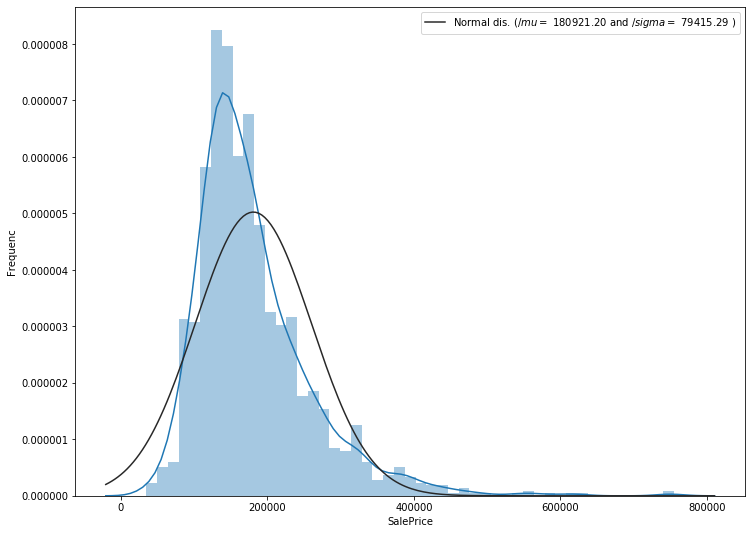

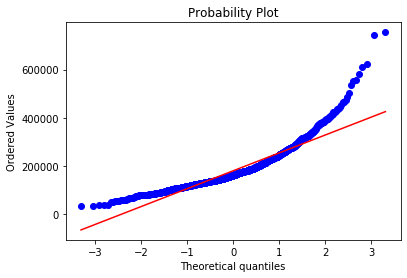

In [5]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

#Get the fitted parameters used by the function 
(mu, sigma) = stats.norm.fit(train['SalePrice'])

#Distribution plot
plt.legend(['Normal dis. ($/mu=$ {:.2f} and $/sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequenc')

#Probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
           

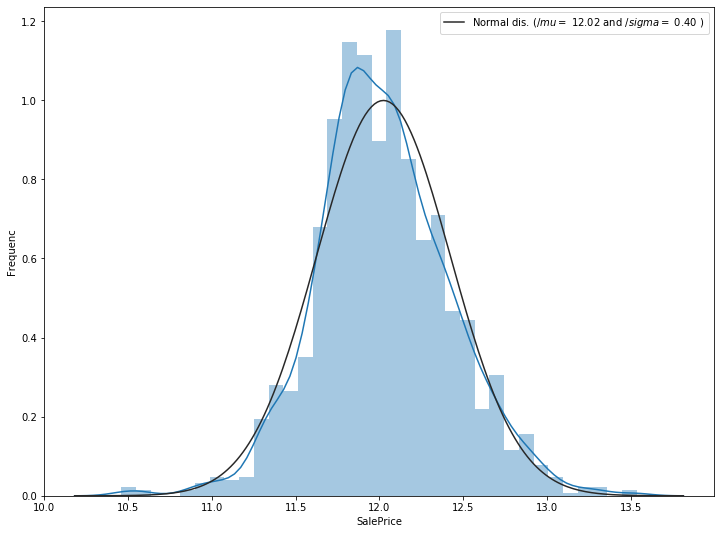

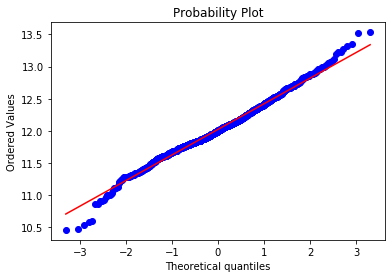

In [6]:
#Log func normalizing
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dis. ($/mu=$ {:.2f} and $/sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequenc')
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
           

## Check the missing values

In [7]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

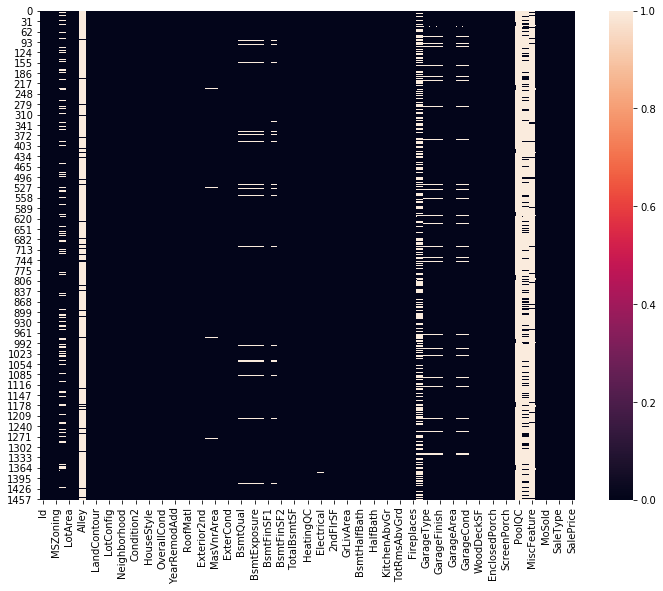

In [8]:
plt.subplots(figsize=(12,9))
sns.heatmap(train.isnull())
plt.show

In [9]:
#Get the per cent of missing dates
isnull = train.isnull().sum()/len(train)*100
isnull = isnull[isnull > 0]
isnull.sort_values(inplace = True, ascending = False)
isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [10]:
#Preparing categories to gist
isnull = isnull.to_frame()
isnull.columns = ['count']
isnull.index.names = ['Name']
isnull['Name'] = isnull.index

<function matplotlib.pyplot.show(*args, **kw)>

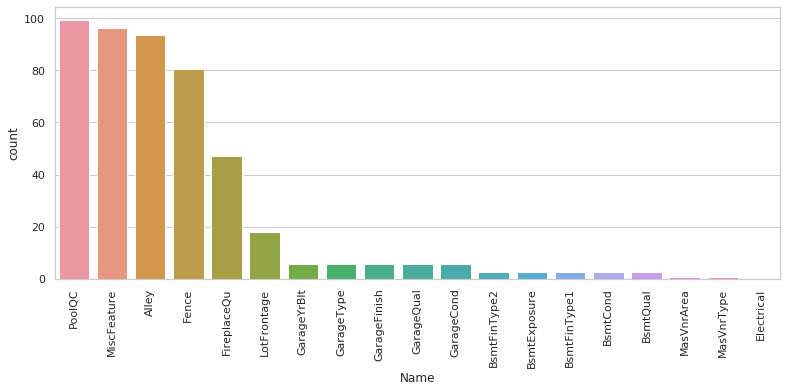

In [11]:
#Get the gist of a missing values 
plt.figure(figsize = (13, 5))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Name', y = 'count', data = isnull)
plt.xticks(rotation=90)
plt.show

## Making corr matrix

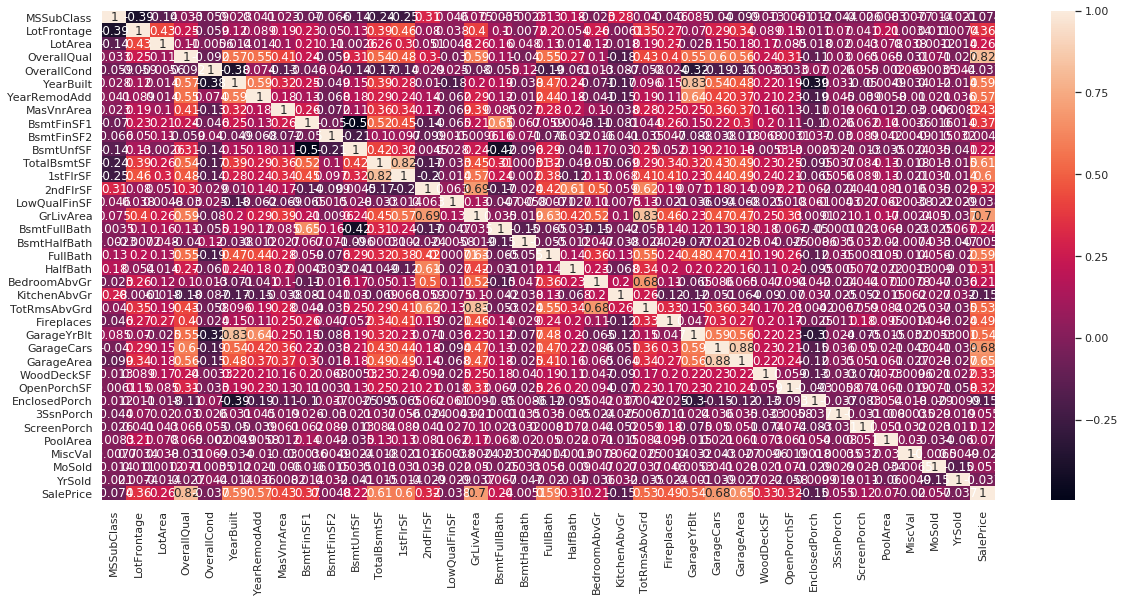

In [12]:
#Preparing dates to matrix
train_corr = train.select_dtypes(include = [np.number])
train_corr.shape
del train_corr['Id'] #removed unnecessary metric
corr = train_corr.corr()
#Building the corr matrix
plt.subplots(figsize = (20, 9))
sns.heatmap(corr, annot = True)

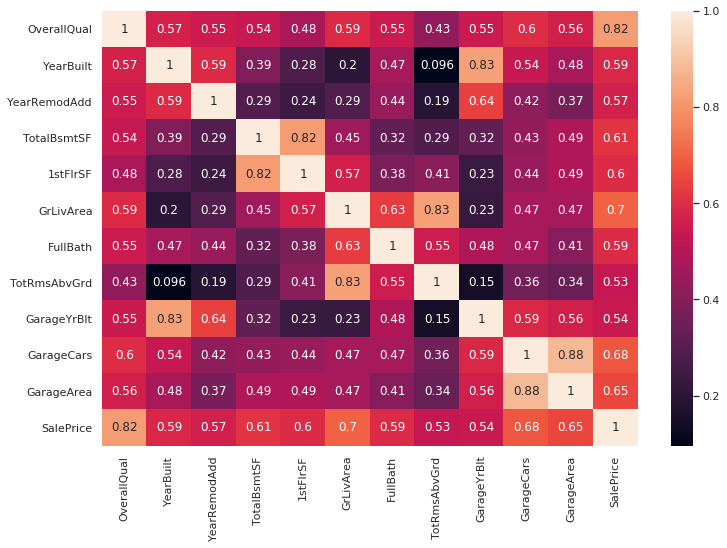

In [13]:
#Cut the matrix to values greater than 0.5 to build a simpler matrix
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()

## Choose the most corr catigories
In this case it is a OverallQual, because it has the max corr with SalePrice.
Corr = 0.82

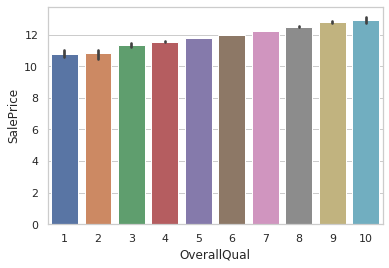

In [14]:
#Viewing corr OverallQual to SalePrice
train.OverallQual.unique()
sns.barplot(train.OverallQual, train.SalePrice)

Gray lines it's a how it changes in this case

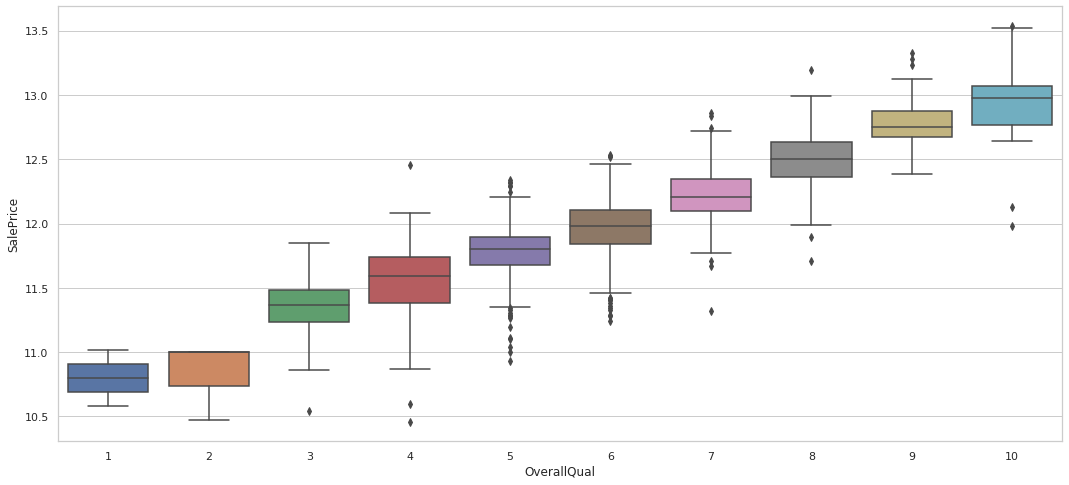

In [15]:
#Consider the correlation in more detail
plt.figure(figsize = (18,8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

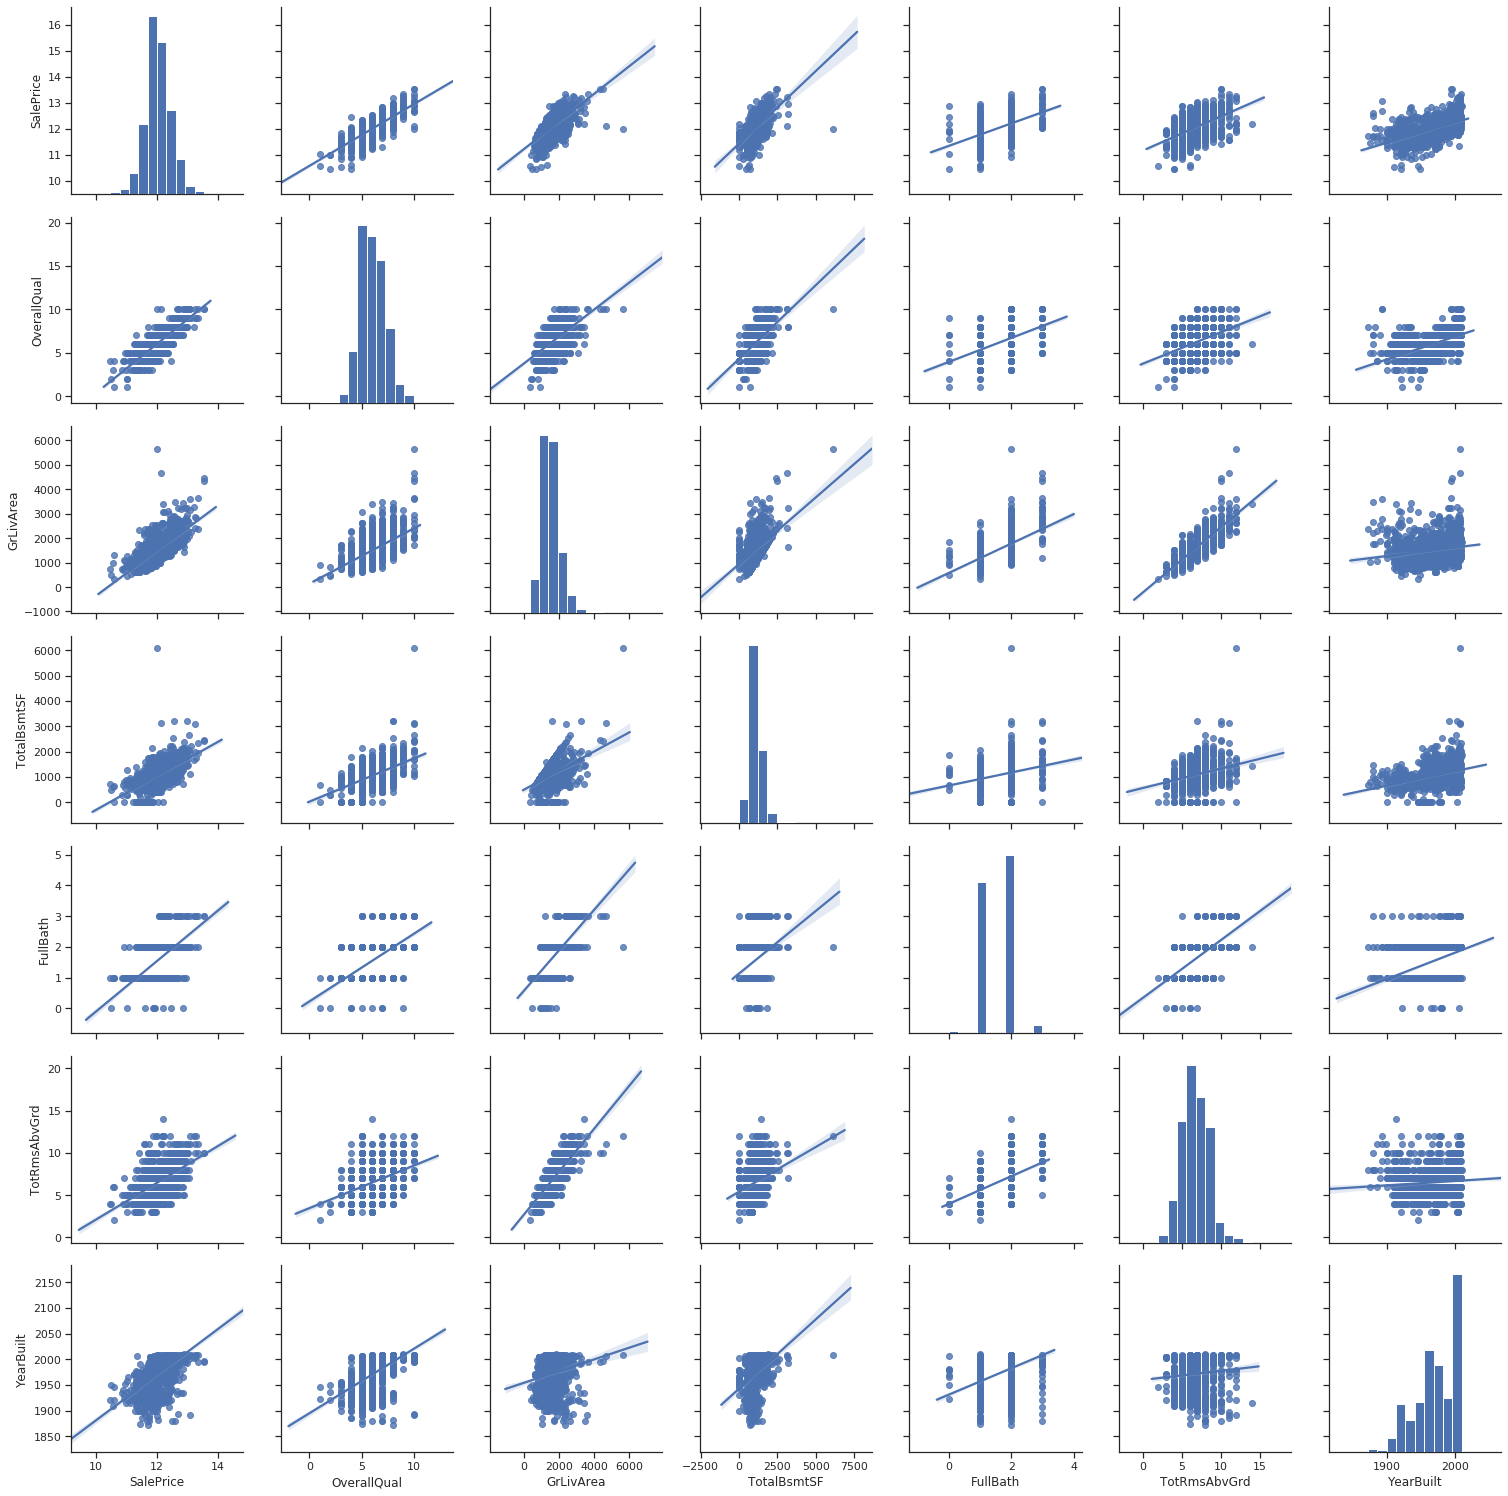

In [16]:
#Viewing corr matrix in graphs
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style = 'ticks')
sns.pairplot(train[col], height=3, kind='reg')

In [17]:
print('The most importent feature relative to target')
corr = train.corr()
corr.sort_values(['SalePrice'],ascending = False, inplace = True)
corr.SalePrice

The most importent feature relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

## Normalize missing values

In [18]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
#Replacing None, cuz this metrix is not importent
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [19]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [20]:
#Replacing zero, cuz this metrix is not importent
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [21]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [22]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

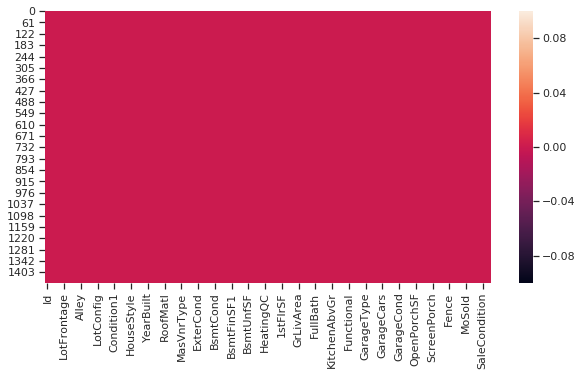

In [23]:
#Checking there is any null value 
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

# Inputing values

In [24]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [25]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

### Prepraring data for prediction

In [26]:
#Take targate variable into y
y = train['SalePrice']
#Delete the saleprice from train 
del train['SalePrice']
#Take their values in X and y
X = train.values
y = y.values

In [27]:
#Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Linear Regression

In [34]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
model.fit(X, y)
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
#Accuracy
print(f"Accuracy --> {model.score(X_test, y_test)*100}%")

Predict value [11.62697971]
Real value 11.767187766223199
Accuracy --> 91.44280083020911%


### GradientRegressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR.fit(X_train, y_train)
predict = GBR.predict(X_train)
print(f"Accuracy --> {GBR.score(X_test, y_test)*100}%")

Accuracy --> 91.82610517405358%


In [31]:
"""predictins = GBR.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = Test_id
submission['SalePrice'] = np.exp(predictins)
submission.to_csv('prediction.csv',index = False)"""

"predictins = GBR.predict(X_test)\nsubmission = pd.DataFrame()\nsubmission['Id'] = Test_id\nsubmission['SalePrice'] = np.exp(predictins)\nsubmission.to_csv('prediction.csv',index = False)"

## RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=1, n_estimators=10, max_depth = 4)
RFR.fit(X_train, y_train)
print(f"Accuracy --> {RFR.score(X_test, y_test)*100}%")

Accuracy --> 83.4140904865701%


## ExtraTreesRegressor

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor(n_estimators=100, max_depth=4)
ETR.fit(X_train, y_train)
print(f"Accuracy --> {ETR.score(X_test, y_test)*100}%")

Accuracy --> 77.85656502870168%
